In [2]:
library(data.table)
library(RcisTarget)
library(igraph)
library(Seurat)
library(dplyr)
library(magrittr)
library(ggplot2)
library(SingleCellExperiment)

library(xlsx)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRa

In [58]:
setwd("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/SCENIC_MPOA_AM_all")

In [7]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")

In [8]:
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)

In [9]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}

In [10]:
celltype<-numeric()
for(i in 1:20){
    celltype<-c(celltype,eval(parse(text = paste("Vgat",i,"_barcode",sep=""))))
}

In [12]:
celltype<-intersect(celltype,rownames(subset(MPOA.integrated@meta.data,stim=="AM")))

In [13]:
MPOA<-subset(MPOA.integrated,cells=celltype)#only selecting Vgat AM

In [14]:
for (i in 1:dim(MPOA@meta.data)[1]){MPOA@meta.data$idents[i]<-as.character(Idents(MPOA)[[i]])}
as.factor(MPOA@meta.data$idents)

exprMatrix <- as.matrix(MPOA@assays$RNA@data) # using log normalized data, important

exprMatrix[1:5,1:4]

[1] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [11] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [21] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [31] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [41] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [51] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [61] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [71] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [81] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [91] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
 [101] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
 [111] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat2 
 [121] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [131] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [141] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [151] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [161] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [171] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [181] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [191] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [201] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [211] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [221] Vgat2  Vgat2  Vgat2  Vgat2  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [231] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [241] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [251] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [261] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [271] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [281] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [291] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [301] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [311] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [321] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [331] Vgat3  Vgat3  Vgat3  Vgat3  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [341] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [351] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [361] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [371] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [381] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [391] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [401] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [411] Vgat4  Vgat4  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5 
 [421] Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5 
 [431] Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5 
 [441] Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5 
 [451] Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5 
 [461] Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5 
 [471] Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5 
 [481] Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5 
 [491] Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5 
 [501] Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5 
 [511] Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat6  Vgat6 

,AAATGCCTCTCTGAGAAM,AACTCCCCAGGGAGAGAM,AACTTTCGTCGCGAAAAM,AATCGGTGTAAGTAGTAM
Xkr4,0,0,0.000000,0
Sox17,0,0,0.000000,0
Mrpl15,0,0,2.142939,0
Lypla1,0,0,0.000000,0
Tcea1,0,0,0.000000,0


In [15]:
cellLabels<-as.data.frame(MPOA@meta.data$idents,row.names=rownames(MPOA@meta.data),col.names="CellType")        

dim(exprMatrix)


[1] 20345  1769

In [16]:
sceMouseBrain <- SingleCellExperiment(assays = list(counts = exprMatrix),
colData=data.frame(cellLabels[colnames(exprMatrix),, drop=FALSE]))

dir.create("data")
save(sceMouseBrain, file="data/sceMouseBrain.RData")


In [18]:
#setwd("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/SCENIC_MPOA_AM_all")
library(SingleCellExperiment)
load("data/sceMouseBrain.RData")
exprMat <- counts(sceMouseBrain)
dim(exprMat)

cellInfo <- colData(sceMouseBrain)
cellInfo$nGene <- colSums(exprMat>0)
cellInfo <- data.frame(cellInfo)
head(cellInfo)

dir.create("int")

saveRDS(cellInfo, file="int/cellInfo.Rds")

[1] 20345  1769

,MPOA.meta.data.idents,nGene
,<fct>,<dbl>
AAATGCCTCTCTGAGAAM,Vgat1,695
AACTCCCCAGGGAGAGAM,Vgat1,812
AACTTTCGTCGCGAAAAM,Vgat1,823
AATCGGTGTAAGTAGTAM,Vgat1,1441
AGAATAGGTACTCAACAM,Vgat1,826
AGCTTGAAGACATAACAM,Vgat1,1219


In [19]:
colVars <- list(CellType=setNames(c("green","darkgreen","forestgreen", "darkorange", "magenta4", "magenta3", "magenta2", "magenta1", "pink","darkred","hotpink", "red3", "red2", "red1", "red4", "blue","lightblue","skyblue", "darkblue","black"), 
   c("Vgat6","Vgat2","Vgat16","Vgat4","Vgat10","Vgat13","Vgat8","Vgat17","Vgat1","Vgat3","Vgat14","Vgat5","Vgat7","Vgat11","Vgat9","Vgat19","Vgat15","Vgat18","Vgat12","Vgat20")))

In [22]:
library(SCENIC)
org="mgi" # or hgnc, or dmel
dbDir="/home/garret/Documents/R code/SCENIC/cisTarget_databases" # RcisTarget databases location
myDatasetTitle="SCENIC example on Mouse brain" # choose a name for your analysis
scenicOptions <- initializeScenic(org=org, dbDir=dbDir, datasetTitle=myDatasetTitle, nCores=6) # I may need to use 4

Motif databases selected: 
  mm9-500bp-upstream-7species.mc9nr.feather 
  mm9-tss-centered-10kb-7species.mc9nr.feather



In [23]:
#setwd("SCENIC_MPOA_AM_all")
scenicOptions@inputDatasetInfo$cellInfo <- "int/cellInfo.Rds"
scenicOptions@inputDatasetInfo$colVars <- "int/colVars.Rds"
# Save to use at a later time...
saveRDS(scenicOptions, file="int/scenicOptions.Rds") 

In [24]:
library("feather")

In [25]:
genesKept <- geneFiltering(exprMat, scenicOptions= scenicOptions, minCountsPerGene = 3 * 0.005 *
  ncol(exprMat), minSamples = ncol(exprMat) * 0.01)

Maximum value in the expression matrix: 7.52697291860645

Ratio of detected vs non-detected: 0.16

Number of counts (in the dataset units) per gene:



    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    3.053   69.314  294.107  349.560 9867.167 


Number of cells in which each gene is detected:



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     3.0    73.0   240.9   356.0  1768.0 



Number of genes left after applying the following filters (sequential):

	11932	genes with counts per gene > 26.535

	11932	genes detected in more than 17.69 cells

	10354	genes available in RcisTarget database

Gene list saved in int/1.1_genesKept.Rds



In [26]:
library("foreach")
#---------------------------------------------------------
#double check
interestingGenes <- c("Esr1", "Ar", "Dlx1","Nfix")
interestingGenes[which(!interestingGenes %in% genesKept)]

character(0)

In [27]:
exprMat_filtered <- exprMat[genesKept, ]
dim(exprMat_filtered)
rm(exprMat)

[1] 10354  1769

[1] 0

In [28]:
corrMat <- cor(t(exprMat_filtered), method="spearman")

saveRDS(corrMat, file=getIntName(scenicOptions, "corrMat"))

In [29]:
# Run GENIE3
runGenie3(exprMat_filtered, scenicOptions)

Using 969 TFs as potential regulators...

Running GENIE3 part 1

Running GENIE3 part 2

Running GENIE3 part 3

Running GENIE3 part 4

Running GENIE3 part 5

Running GENIE3 part 6

Running GENIE3 part 7

Running GENIE3 part 8

Running GENIE3 part 9

Running GENIE3 part 10

Finished running GENIE3.



In [59]:
library(SingleCellExperiment)
library(data.table)
#setwd("SCENIC_MPOA_AM_all")
load("data/sceMouseBrain.RData")
exprMat <- counts(sceMouseBrain) 

dim(exprMat)

library(SCENIC)
library("BiocParallel") # require function "register"

scenicOptions <- readRDS("int/scenicOptions.Rds")
scenicOptions@settings$verbose <- TRUE
scenicOptions@settings$nCores <- 6# default is 20 
scenicOptions@settings$seed <- 123
library(BiocParallel) 
registered()

[1] 20345  1769

$MulticoreParam
class: MulticoreParam
  bpisup: FALSE; bpnworkers: 10; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA
  cluster type: FORK

$SnowParam
class: SnowParam
  bpisup: FALSE; bpnworkers: 10; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA
  cluster type: SOCK

$SerialParam
class: SerialParam
  bpisup: FALSE; bpnworkers: 1; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA


In [31]:
scenicOptions <- readRDS("int/scenicOptions.Rds")
scenicOptions@settings$verbose <- TRUE
scenicOptions@settings$nCores <- 6 # default is 20 
scenicOptions@settings$seed <- 123
library(BiocParallel) 
registered() # your current settings
register(MulticoreParam(workers=6), default = TRUE) 
#register(SnowParam(workers=1), default = FALSE)
#register(SerialParam(), default = TRUE)
system.time(bplapply(1:1000, sqrt))
registered()

$MulticoreParam
class: MulticoreParam
  bpisup: FALSE; bpnworkers: 10; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA
  cluster type: FORK

$SnowParam
class: SnowParam
  bpisup: FALSE; bpnworkers: 10; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA
  cluster type: SOCK

$SerialParam
class: SerialParam
  bpisup: FALSE; bpnworkers: 1; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA


   user  system elapsed 
  0.006   0.213   0.240 

$MulticoreParam
class: MulticoreParam
  bpisup: FALSE; bpnworkers: 6; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA
  cluster type: FORK

$SnowParam
class: SnowParam
  bpisup: FALSE; bpnworkers: 10; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA
  cluster type: SOCK

$SerialParam
class: SerialParam
  bpisup: FALSE; bpnworkers: 1; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA


In [32]:
library(SCENIC)
org="mgi" # or hgnc, or dmel
dbDir="/home/garret/Documents/R code/SCENIC/cisTarget_databases" # RcisTarget databases location
myDatasetTitle="SCENIC example on Mouse brain" # choose a name for your analysis
scenicOptions <- initializeScenic(org=org, dbDir=dbDir, datasetTitle=myDatasetTitle, nCores=6) # I may need to use 4

Motif databases selected: 
  mm9-500bp-upstream-7species.mc9nr.feather 
  mm9-tss-centered-10kb-7species.mc9nr.feather



In [33]:
#BiocParallel::register(BiocParallel::SerialParam())
runSCENIC_1_coexNetwork2modules(scenicOptions)
#install.packages("rstan")
library("rstan")
runSCENIC_2_createRegulons(scenicOptions)

12:09	Creating TF modules



        75%         90% 
0.002060587 0.002805342 


Number of links between TFs and targets: 3935461



             [,1]
nTFs          969
nTargets    10354
nGeneSets    5814
nLinks    4721562


Loading required package: ggplot2

Loading required package: StanHeaders

Registered S3 method overwritten by 'cli':
  method     from    
  print.boxx spatstat

rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


Attaching package: ‘rstan’


The following object is masked from ‘package:magrittr’:

    extract


12:10	Step 2. Identifying regulons


Attaching package: ‘AUCell’


The following object is masked from ‘package:SingleCellExperiment’:

    cbind


The following object is masked from ‘package:SummarizedExperiment’:

    cbind


The following object is masked from ‘package:DelayedArray’:

    cbind


The following object is masked from ‘package:IRanges’:

    cbind


The following object is masked from ‘package:S4Vectors’:

    cbind


The following object is


 top5perTarget           w005 top10perTarget          top50 top50perTarget 
           386            427            782            900            969 
          w001 
           969 


12:10	RcisTarget: Calculating AUC

Scoring database:  [Source file: mm9-500bp-upstream-7species.mc9nr.feather]

Scoring database:  [Source file: mm9-tss-centered-10kb-7species.mc9nr.feather]

12:47	RcisTarget: Adding motif annotation

Number of motifs in the initial enrichment: 1976163

Number of motifs annotated to the matching TF: 11378

12:50	RcisTarget: Prunning targets

14:04	Number of motifs that support the regulons: 11378

	Preview of motif enrichment saved as: output/Step2_MotifEnrichment_preview.html



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     6.0    21.5   339.0   159.2  5224.0 

In [34]:
runSCENIC_3_scoreCells(scenicOptions, exprMat)

14:05	Step 3. Analyzing the network activity in each individual cell

	Number of regulons to evaluate on cells: 349
Biggest (non-extended) regulons: 
	 Taf1 (3832g)
	 Hcfc1 (2902g)
	 Nr3c1 (2717g)
	 Nr2c2 (2099g)
	 Chd2 (2041g)
	 Ets2 (1545g)
	 Yy1 (1436g)
	 E2f6 (1390g)
	 Smarcc2 (1197g)
	 Etv3 (984g)

Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



    min      1%      5%     10%     50%    100% 
 384.00  735.16 1032.20 1261.80 2910.00 4960.00 


Using 6 cores.

Using 6 cores.

14:06	Finished running AUCell.

14:06	Plotting heatmap...

14:06	Plotting t-SNEs...



png 
  2

In [35]:
aucellApp <- plotTsne_AUCellApp(scenicOptions, exprMat)

runSCENIC_4_aucell_binarize(scenicOptions)

Loading required package: rbokeh


Attaching package: ‘rbokeh’


The following object is masked from ‘package:ggplot2’:

    arrow


Binary regulon activity: 236 TF regulons x 1769 cells.
(333 regulons including 'extended' versions)
211 regulons are active in more than 1% (17.69) cells.

Warning message in AUCell_plotTSNE(tSNE = tSNE, exprMat = exprMat, cellsAUC = regulonAUC, :
“Expression plot was requested, but no expression matrix provided.”


png 
  2

# ranking the TFs using socres of coexpression

In [1]:
Coexpression<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/1.4_GENIE3_linkList.Rds")

In [4]:
#201030, final
DEG<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_Cast/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)

In [5]:
#for ranking TF
DEG<-subset(DEG,avg_logFC>0.25)[,1]

In [6]:
Coexpression<-Coexpression[Coexpression$Target %in% DEG,]

In [7]:
length(unique(Coexpression$TF))

[1] 915

In [8]:
TF<-unique(Coexpression$TF)

In [8]:
score<-numeric()
for (i in 1:length(TF)){
    score[i]<-sum(subset(Coexpression,TF==TF[i])$weight)
}
summary<-data.frame("TF"=TF,"score"=score)

In [9]:
summary<-summary[order(-summary$score),]

In [329]:
write.table(summary,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/coexpression_Esr1_summaryFC0.25.csv",col.names =TRUE,row.names=TRUE)

In [10]:
summary$TF<-factor(summary$TF,level=summary$TF)

In [12]:
color<-numeric()
size<-numeric()
for(i in 1:dim(summary)[1]){
    if(summary$TF[i]=="Esr1" |summary$TF[i]=="Pgr" | summary$TF[i]=="Ar"){
        color[i]<-"white"
        size[i]<-6
    }else{
        color[i]<-"white"
        size[i]<- 0
    }
}

In [13]:
library(ggplot2)

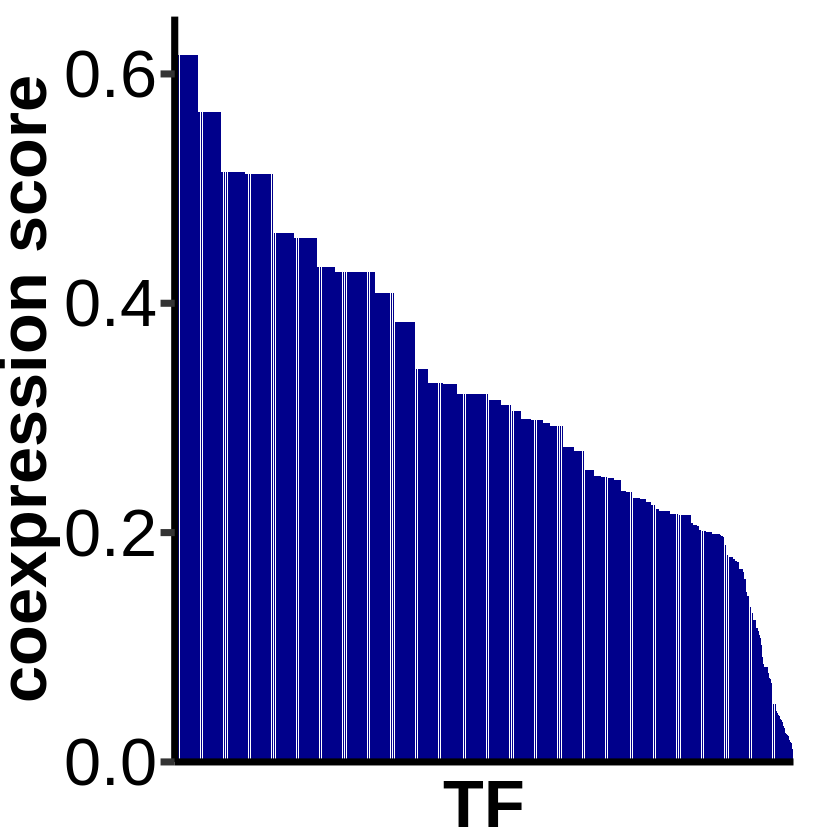

In [15]:
ggplot(summary,aes(x=TF,y=score))+geom_bar(stat = "identity", fill="darkblue")+ylab("coexpression score")+
theme(axis.text.x=element_blank(),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=40,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),axis.ticks.x = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),  axis.ticks.y = element_line(size=2) , plot.margin = margin(10, 28, 0, 0))+
scale_y_continuous(expand = c(0, 0), limits = c(0, 0.65))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/coexpression_Esr1_3TF_FC0.25_narrow.pdf",height=4.5, width=6 , paper = "letter")

# infer direct regulation

In [7]:
library(RcisTarget)

In [8]:
genes<-as.character(unique(Coexpression$Target))

ERROR: Error in unique(Coexpression$Target): object 'Coexpression' not found


In [114]:
genes<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_0.1_246vs34.xlsx",sheetIndex=1)

In [115]:
genes<-as.character(genes[,1])

In [116]:
motifRankings <- importRankings("/home/garret/Documents/R code/SCENIC/cisTarget_databases/mm9-tss-centered-10kb-7species.mc9nr.feather")
data(motifAnnotations_mgi)

In [117]:
#201029
target<-numeric()
for(i in 1:length(genes)){
motifEnrichmentTable<-numeric()
geneLists<-numeric()
motifs_AUC<-numeric()
geneSet1<-genes[i]
geneLists <- list(geneSetName=geneSet1)
try(motifEnrichmentTable_wGenes <- cisTarget(geneLists, motifRankings, motifAnnot=motifAnnotations_mgi),silent=TRUE)
try(motifs_AUC <- calcAUC(geneLists, motifRankings, nCores=1),silent=TRUE)
try(motifEnrichmentTable <- addMotifAnnotation(motifs_AUC, nesThreshold=2,motifAnnot=motifAnnotations_mgi, highlightTFs=list(geneSetName="Esr1")),silent=TRUE)
if(sum(exists("motifEnrichmentTable"))==0){target<-target}
else if(is.null(dim(motifEnrichmentTable)[1])){target<-target}
else if(dim(motifEnrichmentTable)[1]==0){target<-target}
else if(dim(subset(motifEnrichmentTable,TFinDB=="**"))[1]>0){target<-c(target,genes[i])}
else{ target<-target}
}

In [119]:
#201106
write.csv(target,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/Esr1_direct_target_KO_male.csv")

In [16]:
#calculating DEGs
Esr1KO<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_0.1_246vs34.xlsx",sheetIndex=1)[,1]
GDX<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_Cast/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
Vgatlow<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/low/gene_adjust_0.1_0.1_246vs34.xlsx",sheetIndex=1)[,1]

# Indirect regulation

In [20]:
#201106 more includsive for TF than ranking
Coexpression<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/1.4_GENIE3_linkList.Rds")
DEG<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_0.1_246vs34.xlsx",sheetIndex=1)[,1]
Coexpression<-Coexpression[Coexpression$Target %in% DEG,]
TF<-unique(Coexpression$TF)

In [24]:
library(RcisTarget)

In [25]:
genes<-as.character(TF)

In [124]:
motifRankings <- importRankings("/home/garret/Documents/R code/SCENIC/cisTarget_databases/mm9-tss-centered-10kb-7species.mc9nr.feather")
data(motifAnnotations_mgi)

In [125]:
#identifying TFs which are potentially targeted by Esr1
#201106
target<-numeric()
for(i in 1:length(genes)){
motifEnrichmentTable<-numeric()
geneLists<-numeric()
motifs_AUC<-numeric()
geneSet1<-genes[i]
geneLists <- list(geneSetName=geneSet1)
try(motifEnrichmentTable_wGenes <- cisTarget(geneLists, motifRankings, motifAnnot=motifAnnotations_mgi),silent=TRUE)
try(motifs_AUC <- calcAUC(geneLists, motifRankings, nCores=1),silent=TRUE)
try(motifEnrichmentTable <- addMotifAnnotation(motifs_AUC, nesThreshold=2,motifAnnot=motifAnnotations_mgi, highlightTFs=list(geneSetName="Esr1")),silent=TRUE)
if(sum(exists("motifEnrichmentTable"))==0){target<-target}
else if(is.null(dim(motifEnrichmentTable)[1])){target<-target}
else if(dim(motifEnrichmentTable)[1]==0){target<-target}
else if(dim(subset(motifEnrichmentTable,TFinDB=="**"))[1]>0){target<-c(target,genes[i])}
else{ target<-target}
}

In [126]:
#201106
write.csv(target,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/Esr1_indirect_target.csv")

In [27]:
library(tidyverse)

Registered S3 method overwritten by 'cli':
  method     from    
  print.boxx spatstat

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.2     ✔ stringr 1.4.0
✔ tidyr   1.1.0     ✔ forcats 0.5.0
✔ readr   1.3.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tibble::as_data_frame() masks dplyr::as_data_frame(), igraph::as_data_frame()
✖ dplyr::between()        masks data.table::between()
✖ purrr::compose()        masks igraph::compose()
✖ tidyr::crossing()       masks igraph::crossing()
✖ dplyr::filter()         masks stats::filter()
✖ dplyr::first()          masks data.table::first()
✖ dplyr::groups()         masks igraph::groups()
✖ dplyr::lag()            masks stats::lag()
✖ dplyr::last()           masks data.table::last()
✖ purrr::simplify()       masks igraph::simplify()
✖ purrr::transpose()      masks data.table::transpose()



In [28]:
Esr1_target<-read_csv("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/Esr1_indirect_target.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  x = col_character()
)



In [29]:
Esr1_target<-Esr1_target[[2]]

In [31]:
#201106
KO_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_0.1_246vs34.xlsx",sheetIndex=1)

In [32]:
KO_gene<-as.character(KO_gene[,1])

In [34]:
Esr1_TF<-intersect(intersect(TF,KO_gene),Esr1_target)

In [134]:
# constructing regulons
regulons<-vector(mode = "list")

In [135]:
motifRankings <- importRankings("/home/garret/Documents/R code/SCENIC/cisTarget_databases/mm9-tss-centered-10kb-7species.mc9nr.feather")
data(motifAnnotations_mgi)

In [136]:
#among Esr1-DEG, what genes are regulated by esr1-TFs
for(j in 1:length(Esr1_TF)){
temp_target<-numeric()
for(i in 1:length(KO_gene)){
motifEnrichmentTable<-numeric()
geneLists<-numeric()
motifs_AUC<-numeric()   
geneSet1<-KO_gene[i]
geneLists <- list(geneSetName=KO_gene[i])
try(motifEnrichmentTable_wGenes <- cisTarget(geneLists, motifRankings, motifAnnot=motifAnnotations_mgi),silent=TRUE)
try(motifs_AUC <- calcAUC(geneLists, motifRankings, nCores=1),silent=TRUE)
try(motifEnrichmentTable <- addMotifAnnotation(motifs_AUC, nesThreshold=2,motifAnnot=motifAnnotations_mgi, highlightTFs=list(geneSetName=Esr1_TF[j])),silent=TRUE)
if(sum(exists("motifEnrichmentTable"))==0){temp_target<-temp_target}
else if(is.null(dim(motifEnrichmentTable)[1])){temp_target<-temp_target}
else if(dim(motifEnrichmentTable)[1]==0){temp_target<-temp_target}
else if(dim(subset(motifEnrichmentTable,TFinDB=="**"))[1]>0){temp_target<-c(temp_target,KO_gene[i])}
else{ temp_target<-temp_target}
}
    regulons[[Esr1_TF[j]]]<-temp_target
                              }

In [137]:
#201106
saveRDS(regulons,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/regulons_indirect.rds")

In [29]:
test<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/regulons_indirect.rds")

In [27]:
Esr1_TF

[1] "Esr1"   "Rps10"  "Zbtb20" "Pou6f2" "Zmat4"  "Cstf2"  "Zfp74"

In [31]:
sum<-numeric()
for(i in 1:length(test)){
    sum<-c(sum,test[[i]])
}

In [42]:
#the number excluding Esr1
sum<-numeric()
for(i in 2:length(test)){
    sum<-c(sum,test[[i]])
}
length(unique(sum))
100*length(unique(sum))/length(KO_gene)

[1] 167

[1] 27.83333

In [43]:
female<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx",sheetIndex=1)
female<-as.character(female[,1])

In [44]:
common<-intersect(KO_gene,female)

In [47]:
#dimorphic TF
male_TF<-names(test)
female_TF<-names(readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/regulons_indirect.rds"))
length(male_TF)-length(intersect(female_TF,male_TF))

[1] 3

# visualizing Esr1 regulons

In [40]:
regulons<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/regulons_indirect.rds")

In [22]:
library(xlsx)

In [42]:
#201108
KO_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_0.1_246vs34.xlsx",sheetIndex=1)

In [43]:
KO_gene<-as.character(KO_gene[,1])

In [44]:
#201108
test<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/regulons_indirect.rds")
sum<-numeric()
for(i in 1:length(test)){
    sum<-c(sum,test[[i]])
}

In [45]:
sum<-unique(sum)

In [25]:
TF<-names(regulons)

In [27]:
sum<-unique(c(sum,TF))

In [28]:
KO_gene<-sum

In [29]:
library(igraph)

In [31]:
data<-matrix(NA, ncol=length(KO_gene),nrow=length(KO_gene))
colnames(data)=rownames(data)=KO_gene

In [33]:
for(i in 1:length(KO_gene)){
    for(j in 1:length(KO_gene)){
      if((rownames(data)[i] %in% TF) & (colnames(data)[j] %in% regulons[[rownames(data)[i]]])) 
         {data[i,j]<- 1}
         else{data[i,j]<- 0}
    }
}

In [18]:
network<-graph_from_adjacency_matrix(data)

In [60]:
saveRDS(network,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/network.rds")

In [18]:
tf<-TF[TF != "Esr1"]

In [20]:
write.xlsx2(KO_gene,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/Esr1_KO_genes_regulone.xlsx")

In [19]:
Neuron_BP<-read.table(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/GO_Biological_Process_2018_table.txt", header = TRUE, sep = "\t", quote = "\"",dec=".",fill=TRUE,comment.char="")
Neuron_MF<-read.table(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/GO_Molecular_Function_2018_table.txt", header = TRUE, sep = "\t", quote = "\"",dec=".",fill=TRUE,comment.char="")
Neuron_CC<-read.table(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/GO_Cellular_Component_2018_table.txt", header = TRUE, sep = "\t", quote = "\"",dec=".",fill=TRUE,comment.char="")
Neuron_BP<-Neuron_BP[order(Neuron_BP$Adjusted.P.value),]
Neuron_MF<-Neuron_MF[order(Neuron_MF$Adjusted.P.value),]
Neuron_CC<-Neuron_CC[order(Neuron_CC$Adjusted.P.value),]
Neuron_BP<-subset(Neuron_BP,Adjusted.P.value<0.2)
Neuron_MF<-subset(Neuron_MF,Adjusted.P.value<0.2)
Neuron_CC<-subset(Neuron_CC,Adjusted.P.value<0.2)
Neuron_BP$Term<-gsub('.{12}$','',as.character(Neuron_BP$Term))
Neuron_MF$Term<-gsub('.{12}$','',as.character(Neuron_MF$Term))
Neuron_CC$Term<-gsub('.{12}$','',as.character(Neuron_CC$Term))

In [20]:
CC_term<-c("gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",
           "gene_expression","gene_expression","morphology","energy","gene_expression",
           "energy","energy","gene_expression","gene_expression","synapse",
          "gene_expression","morphology","morphology","gene_expression","morphology",           
          "synapse","synapse","gene_expression","gene_expression","synapse",           
          "gene_expression","energy","energy","energy","gene_expression","synapse")

In [21]:
gene_expression_CC<-numeric()
synapse_CC<-numeric()
#membrane_conductance_CC<-numeric()
energy_CC<-numeric()
morphology_CC<-numeric()

for(i in 1:length(CC_term)){
    if(CC_term[i]=="gene_expression"){
        gene_expression_CC<-c(gene_expression_CC,unlist(strsplit(as.character(Neuron_CC$Genes[i]), "\\;")))
    }else if(CC_term[i]=="synapse"){
        synapse_CC<-c(synapse_CC,unlist(strsplit(as.character(Neuron_CC$Genes[i]), "\\;")))
    }else if(CC_term[i]=="energy"){
        energy_CC<-c(energy_CC,unlist(strsplit(as.character(Neuron_CC$Genes[i]), "\\;")))
    }else if(CC_term[i]=="morphology"){
        morphology_CC<-c(morphology_CC,unlist(strsplit(as.character(Neuron_CC$Genes[i]), "\\;")))
    }
}
gene_expression_CC<-unique(gene_expression_CC)
synapse_CC<-unique(synapse_CC)
energy_CC<-unique(energy_CC)
morphology_CC<-unique(morphology_CC)

In [22]:
library(stringr) 

In [23]:
gene_expression_CC<-str_to_title(gene_expression_CC)
synapse_CC<-str_to_title(synapse_CC)
morphology_CC<-str_to_title(morphology_CC)
energy_CC<-str_to_title(energy_CC)

In [24]:
MF_term<-c("gene_expression","energy","energy","morphology","gene_expression",
           "gene_expression","gene_expression","gene_expression","energy","gene_expression","gene_expression")

In [25]:
gene_expression_MF<-numeric()
synapse_MF<-numeric()
#membrane_conductance_CC<-numeric()
energy_MF<-numeric()
morphology_MF<-numeric()

for(i in 1:length(MF_term)){
    if(MF_term[i]=="gene_expression"){
        gene_expression_MF<-c(gene_expression_MF,unlist(strsplit(as.character(Neuron_MF$Genes[i]), "\\;")))
    }else if(MF_term[i]=="synapse"){
        synapse_MF<-c(synapse_MF,unlist(strsplit(as.character(Neuron_MF$Genes[i]), "\\;")))
    }else if(MF_term[i]=="energy"){
        energy_MF<-c(energy_MF,unlist(strsplit(as.character(Neuron_MF$Genes[i]), "\\;")))
    }else if(MF_term[i]=="morphology"){
        morphology_MF<-c(morphology_MF,unlist(strsplit(as.character(Neuron_MF$Genes[i]), "\\;")))
    }
}
gene_expression_MF<-unique(gene_expression_MF)
synapse_MF<-unique(synapse_MF)
energy_MF<-unique(energy_MF)
morphology_MF<-unique(morphology_MF)
gene_expression_MF<-str_to_title(gene_expression_MF)
synapse_MF<-str_to_title(synapse_MF)
morphology_MF<-str_to_title(morphology_MF)
energy_MF<-str_to_title(energy_MF)    
    

In [26]:
BP_term<-c("gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",
           "gene_expression","gene_expression","gene_expression","energy","energy",
           "energy","morphology","energy","morphology","gene_expression",
           "morphology","gene_expression","morphology","gene_expression","gene_expression",
           "energy","energy","energy","morphology","synapse",
           "synapse","energy","gene_expression","gene_expression","synapse",
           "synapse","gene_expression","synapse","gene_expression","synapse",
           "synapse","gene_expression","synapse","synapse","synapse",
           "gene_expression","morphology","gene_expression","energy","gene_expression",
           "gene_expression","gene_expression","gene_expression","energy","gene_expression",
           "energy","gene_expression","gene_expression","gene_expression","gene_expression",
           "gene_expression","gene_expression","gene_expression","synapse","morphology")

In [27]:
length(BP_term)

[1] 70

In [28]:
gene_expression_BP<-numeric()
synapse_BP<-numeric()
#membrane_conductance_CC<-numeric()
energy_BP<-numeric()
morphology_BP<-numeric()

for(i in 1:length(BP_term)){
    if(BP_term[i]=="gene_expression"){
        gene_expression_BP<-c(gene_expression_BP,unlist(strsplit(as.character(Neuron_BP$Genes[i]), "\\;")))
    }else if(BP_term[i]=="synapse"){
        synapse_BP<-c(synapse_BP,unlist(strsplit(as.character(Neuron_BP$Genes[i]), "\\;")))
    }else if(BP_term[i]=="energy"){
        energy_BP<-c(energy_BP,unlist(strsplit(as.character(Neuron_BP$Genes[i]), "\\;")))
    }else if(BP_term[i]=="morphology"){
        morphology_BP<-c(morphology_BP,unlist(strsplit(as.character(Neuron_BP$Genes[i]), "\\;")))
    }
}
gene_expression_BP<-unique(gene_expression_BP)
synapse_BP<-unique(synapse_BP)
energy_BP<-unique(energy_BP)
morphology_BP<-unique(morphology_BP)
gene_expression_BP<-str_to_title(gene_expression_BP)
synapse_BP<-str_to_title(synapse_BP)
morphology_BP<-str_to_title(morphology_BP)
energy_BP<-str_to_title(energy_BP) 

In [29]:
gene_expression<-unique(c(gene_expression_CC,gene_expression_MF,gene_expression_BP))
synapse<-unique(c(synapse_CC,synapse_MF,synapse_BP))
energy<-unique(c(energy_CC,energy_MF,energy_BP))
morphology<-unique(c(morphology_CC,morphology_MF,morphology_BP))

In [30]:
all<-c(gene_expression,synapse,energy,morphology)
duplicate<-all[duplicated(all)]

In [31]:
duplicate

[1] "Hspa8"    "Cript"    "Cobl"     "Map2"     "Atxn10"   "Rpl28"   
  [7] "Ryr2"     "Rala"     "Ywhab"    "Ap1s2"    "Snca"     "Nedd4"   
 [13] "Prkce"    "Tmsb4x"   "Atp1b3"   "Vps35"    "Rps6ka6"  "Fxr2"    
 [19] "Sh3gl2"   "Rbfox3"   "Nell1"    "Fgfr1"    "Snca"     "Mrps36"  
 [25] "Mrps12"   "Mt-Atp6"  "Mrpl42"   "Atp5e"    "Dnajc19"  "Ptcd3"   
 [31] "Mrps21"   "Atp5f1"   "Dnajc15"  "Pts"      "Rps6ka6"  "C1qbp"   
 [37] "Sacs"     "Mfn2"     "Vps35"    "Hars"     "Hspa9"    "Agtpbp1" 
 [43] "Pdha1"    "Bnip3"    "Hspe1"    "Nipsnap2" "Nos1ap"   "Grsf1"   
 [49] "Tomm5"    "Hspa8"    "Ola1"     "Atg3"     "Rpl5"     "Rpl30"   
 [55] "Rala"     "Rpl31"    "Ywhab"    "Rplp1"    "Rpl12"    "Gdi2"    
 [61] "Rpl9"     "Rpl7"     "Hsp90b1"  "Rps4x"    "Rpl7a"    "Rps17"   
 [67] "Rps16"    "Cfl1"     "Rplp2"    "Rps2"     "Rpl18"    "Rps10"   
 [73] "Rps13"    "Pdia3"    "Hspa9"    "Hspa8"    "Npm1"     "Rps7"    
 [79] "Hspa5"    "Rpl23"    "Rpl22"    "Ctnnb1"   "Ezr"      "Ppia"    
 [85] "Robo2"    "Cntnap2"  "Pard3"    "Scn8a"    "Nrcam"    "Sptbn1"  
 [91] "Fxr2"     "Kcnb1"    "Sacs"     "Cobl"     "Ctnna2"   "Snca"    
 [97] "Ola1"     "Ptprm"    "Cdh8"     "Rtn4"     "Pcmt1"    "Kif5b"   
[103] "Cct8"     "Snx5"     "Nop56"    "Rpl23a"   "Paics"    "Eif3e"   
[109] "Eif4g2"   "Gfra1"    "Irs2"     "Vldlr"    "Slitrk1"  "Slitrk6" 
[115] "Ephb1"    "Nyap1"    "Nyap2"    "Impact"   "Map2"     "Dock4"

In [32]:
m_gene<-c('Rps4x', 'Rpl7a','Rpl30','Impact','Atxn2',"Fxr2",'Rpl31',"Larp4b","Rpl18","Rpl39","Rps21","Ap4s1","Vps35","Hspa8", 
         "Eif4a2","Ankrd13c","Arfgef1","Ywhab","Wrnip1","Hsp90b1","Klhl7","Nedd4","Atxn10","Tcp1","Cct8","Cct4","Rps6ka6",
         "Rbfox3","Fgfr1","Pts","Hars","Dnajc19","Hspa9","Ptcd3","Agtpbp1","Hspe1","Grsf1","Eef1a1","Hspa8","Cct8","Ppia","Ola1", 
          "Atg3","Rpl5","Rala","Rplp1","Rpl12","Gdi2","Rpl9","Rpl7","Rpl7a","Rps17","Rps16","Rplp2","Rps2","Rpl18",
         "Rps10","Rps13","Pdia3","Hspa9","Hspa8","Npm1","Rps7","Hspa5","Rpl23","Rpl22","Ctnnb1","Snx16","Snx10","Snx5",
         "Pcmt1","Nop56","Rpl23a","Paics","Eif3e","Eif4g2","Ret","Gfra1","Irs2","Rpl28","Ap1s2","Prkce","Nell1")
m_energy<-c("Mt-Nd4","Mt-Nd5","Ndufb6","Ndufb5","Ndufa4","Ndufs4","Ndufa1","Mt-Nd2","Mt-Nd3","Mt-Nd1","Cox8a","Mt-Co1",
           "Mt-Co2","Mt-Co3","Cox5a","Mrpl42","Mrps36","Mrps12","Mrps21","C1qbp","Mfn2","Pdha1","Bnip3","Atp5f1","Nipsnap2",
           "Cycs","Tomm5","Uqcrb","Gpd2","Mt-Atp6","Atp5e","Kif5b","Dnajc15")
m_morphology<-c("Cobl","Ezr","Tmsb4x","Nrcam","Ctnna2","Sacs","Nrp1","Dock7","Cfl1","Cntnap2","Sptbn1",'Ptprm',  
               "Cdh8","Rtn4","Vldlr","Slitrk1","Pard3","Slitrk6","Ephb1", "Nyap1","Nyap2","Map2","Dock4","Myh10")
m_synapse<-c('Slc32a1',"Nos1ap","Snca","Atp1b3","Robo2","Sh3gl2","Scn8a","Htr1b","Gad2",'Cript',"Ryr2","Kcnb1" )

In [33]:
gene_expression<-gene_expression[gene_expression %in% c(m_energy,m_morphology,m_synapse) ==FALSE]
synapse<-synapse[synapse %in% c(m_energy,m_morphology,m_gene) ==FALSE]
energy<-energy[energy %in% c(m_synapse,m_morphology,m_gene) ==FALSE]
morphology<-morphology[morphology %in% c(m_synapse,m_energy,m_gene) ==FALSE]

In [34]:
all<-c(gene_expression,synapse,energy,morphology)
duplicate<-all[duplicated(all)]

In [35]:
length(all)

[1] 314

In [36]:
duplicate #doulbe check that this is zero

character(0)

In [37]:
energy<-str_replace(energy, "Mt-", "mt-")

In [38]:
length(KO_gene)
length(intersect(all,KO_gene))

[1] 220

[1] 123

In [39]:
KO_gene[KO_gene %in% intersect(all,KO_gene)==FALSE]

[1] "Pdzrn4"        "Nos1"          "Vsnl1"         "Unc5d"        
 [5] "Chl1"          "Phyhipl"       "Meg3"          "Zbtb20"       
 [9] "Ankrd46"       "Prkacb"        "Snn"           "Hpcal1"       
[13] "Maged1"        "Phactr1"       "Prkcb"         "Tmem30a"      
[17] "Atp2b1"        "A830018L16Rik" "1500009L16Rik" "Lrrfip2"      
[21] "Hcn1"          "Crk"           "Tnpo3"         "Wnt4"         
[25] "Cckar"         "Atxn7l1"       "Pcp4l1"        "Daam1"        
[29] "Ift81"         "Pclo"          "Shisa6"        "Specc1"       
[33] "Tmem150c"      "Pim3"          "Ralgps2"       "Lhfpl3"       
[37] "Ncam2"         "Armcx4"        "Pcbd1"         "Zfp385b"      
[41] "Tmem167"       "Dock3"         "Lrrn3"         "Tax1bp1"      
[45] "Zfp74"         "Pgr"           "Fstl5"         "Id4"          
[49] "Lrp1b"         "Unc80"         "Scml4"         "Nos1ap"       
[53] "Enpp2"         "Sec22a"        "Tmeff1"        "Cntnap4"      
[57] "Mast4"         "Irs4"          "Psd3"          "Gfra1"        
[61] "Dynlt3"        "Arhgap36"      "Plcxd3"        "Park2"        
[65] "Snrpb2"        "Pwwp2a"        "Ncor1"         "Bbip1"        
[69] "Mal2"          "Zfyve9"        "Zadh2"         "Cbx4"         
[73] "Plekha7"       "Gpbp1"         "Olfm3"         "Glra2"        
[77] "Rbms3"         "Frmd4a"        "Acvr1c"        "Stim2"        
[81] "Pitpnc1"       "Nuak1"         "Ptp4a1"        "Camk4"        
[85] "Cadm2"         "Dlgap1"        "Shisa2"        "Itfg1"        
[89] "Tmem215"       "Mettl9"        "Dmtf1"         "Ggps1"        
[93] "Rtn3"          "Ikzf2"         "Scd1"          "4833439L19Rik"
[97] "Fam69a"

In [40]:
network<-graph_from_adjacency_matrix(data)

In [41]:
color<-numeric()

size<-numeric()
shape<-numeric()
name<-numeric()
gene_size<-3.5
label_color<-numeric()
for(i in 1:length(V(network))){
    if(V(network)[i]$name=="Esr1"){
        color[i]<-"gold"
        size[i]<-8
        shape[i]<-"sphere"
        name[i]<-"Esr1"
        label_color<-"black"
    }else if(V(network)[i]$name %in% tf){
        color[i]<-"darkslategray4"
        size[i]<-5
        shape[i]<-"square"
        name[i]<-V(network)[i]$name
        label_color<-"black"
    }else if(V(network)[i]$name %in% gene_expression){
        color[i]<-"darkgreen"
        size[i]<-gene_size
        shape[i]<-"circle"
        name[i]<-""
        label_color<-"yellow"
    }else if(V(network)[i]$name %in% synapse){
        color[i]<-"darkblue"
        size[i]<-gene_size
        shape[i]<-"circle"
        name[i]<-""
        label_color<-"yellow"
    }
        else if(V(network)[i]$name %in% energy){
        color[i]<-"salmon"
        size[i]<-gene_size
        shape[i]<-"circle"
        name[i]<-""
        label_color<-"yellow"
    }
        else if(V(network)[i]$name %in% morphology){
        color[i]<-"yellow3"
        size[i]<-gene_size
        shape[i]<-"circle"
        name[i]<-""
        label_color<-"yellow"
    }else{
         color[i]<-"gray50"
        size[i]<-gene_size
        shape[i]<-"circle"
        name[i]<-""
        label_color<-"yellow"
        }
}
V(network)$color<-color
V(network)$size<-size
V(network)$shape<-shape
V(network)$name<-name


In [42]:
edge.color<-numeric()
edge.arrow.size<-numeric()
width<-numeric()
for(i in 1:length(E(network))){
    if(get.edgelist(network)[i,1]=="Esr1"){
        edge.color[i]<-"tomato"
        width[i]<-0.7
        edge.arrow.size[i]<-0.12
    }else if(get.edgelist(network)[i,1] %in% tf){
        edge.color[i]<-"blueviolet"
        width[i]<-0.4
        edge.arrow.size[i]<-0.12
    }
}
E(network)$edge.color<-edge.color
E(network)$width<-width

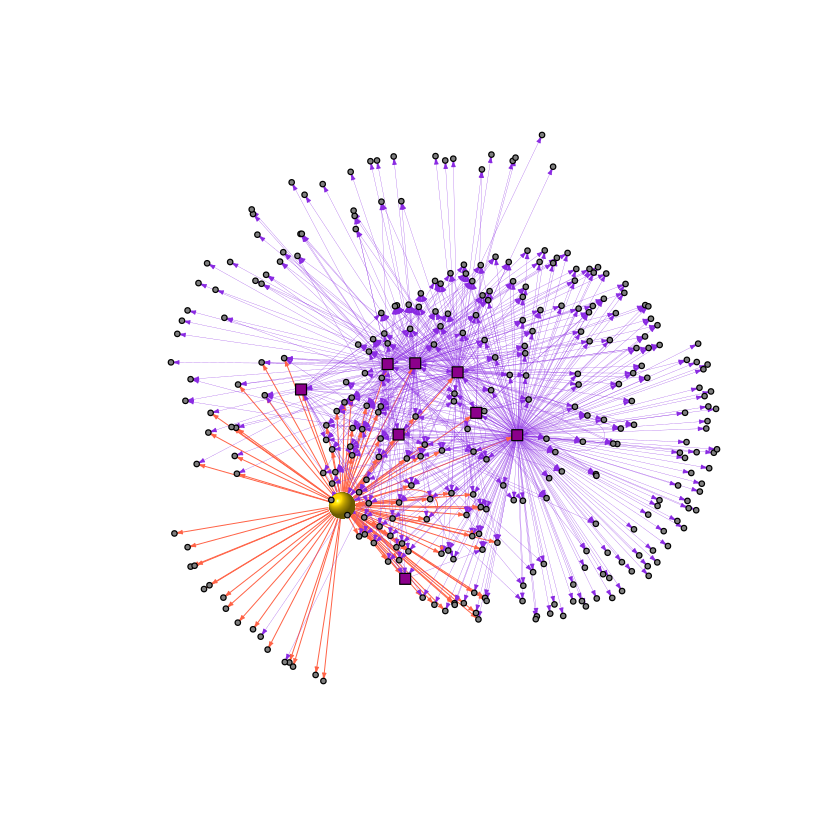

In [100]:
plot(network,vertex.label=NA,edge.arrow.size=edge.arrow.size,edge.color=edge.color,jitter = TRUE,vertex.col=color, layout=layout.kamada.kawai)
#plot(network,edge.arrow.size=.2,edge.color=edge.color,jitter = TRUE)

In [65]:
layout<-layout_as_star(network, center = TF, order = NULL)

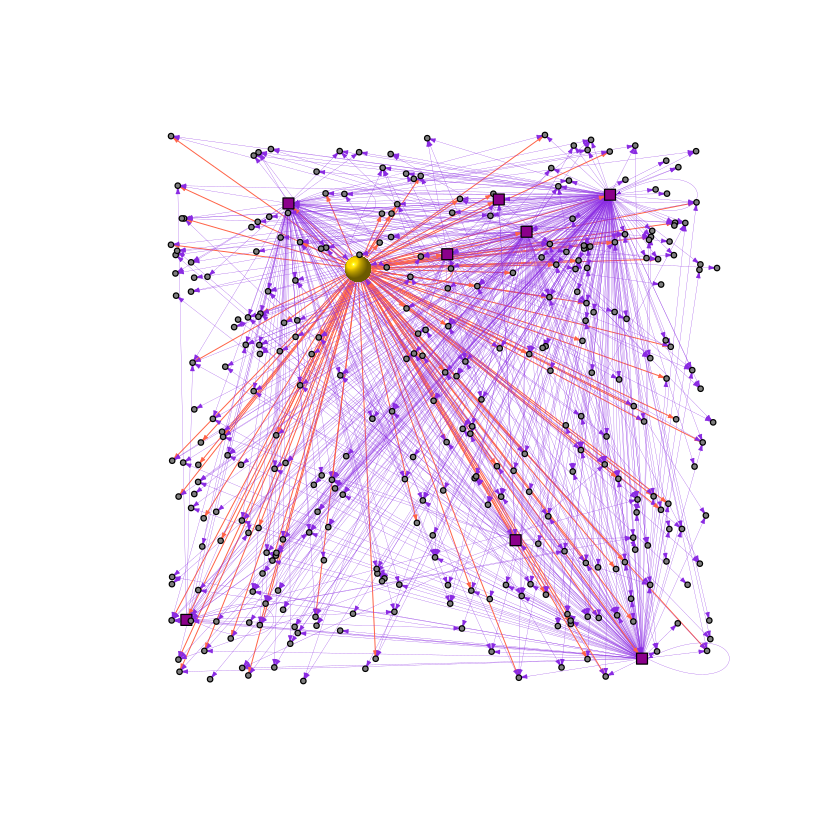

In [102]:
lay <- layout.norm(layout.random(network), -1,1,-1,1)
plot(network,vertex.label=NA,edge.arrow.size=edge.arrow.size,edge.color=edge.color,jitter = TRUE,vertex.col=color, layout=lay)

In [ ]:
https://igraph-help.nongnu.narkive.com/g6IlUmTW/vertex-overlap-layout

In [398]:
lay <- layout.norm(layout.random(network), -1,1,-1,1)
lay2 <- layout.graphopt(network, niter=20, start=lay, max.sa.movement=1/300)
lay2 <- layout.norm(lay2, -1,1, -1,1)
#plot(network,vertex.label=NA,edge.arrow.size=edge.arrow.size,edge.color=edge.color,jitter = TRUE,vertex.col=color, layout=lay2)

In [121]:
lay <- layout.norm(layout.auto(network), -1,1,-1,1)
lay2 <- layout.graphopt(network, niter=80, start=lay, max.sa.movement=200)
#lay2 <- layout.auto(lay2)

In [43]:
lay2<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/layer_80_200.rds")

In [51]:
png("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/layer_80_200.png", units="in", width=5, height=5, res=1200)
# insert ggplot code

plot(network,vertex.frame.color=NA,vertex.label.color="black",vertex.label.font=2,vertex.label.cex=1.5,edge.arrow.size=edge.arrow.size,edge.color=edge.color,jitter = TRUE,vertex.col=color, layout=lay2)
dev.off()

png 
  2

In [52]:
pdf("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/layer_80_200.pdf", width=5, height=5)
# insert ggplot code

plot(network,vertex.frame.color=NA,vertex.label.color="black",vertex.label.font=2,vertex.label.cex=1.5,edge.arrow.size=edge.arrow.size,edge.color=edge.color,jitter = TRUE,vertex.col=color, layout=lay2)
dev.off()

png 
  2

In [125]:
saveRDS(lay2,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/layer_80_200.rds")

In [393]:
lay <- layout.norm(layout.random(network), -1,1,-1,1)
lay2 <- layout.graphopt(network, niter=10, start=lay, max.sa.movement=1/200)
lay2 <- layout.norm(lay2, -1,1, -1,1)
pdf(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/network10-200.pdf",width = 10, height = 7) #
plot(network,vertex.frame.color=NA,vertex.label.color="black",vertex.label.font=2 ,vertex.label.cex=0.8,edge.arrow.size=edge.arrow.size,edge.color=edge.color,jitter = TRUE,vertex.col=color, layout=lay2)
dev.off()

png 
  2

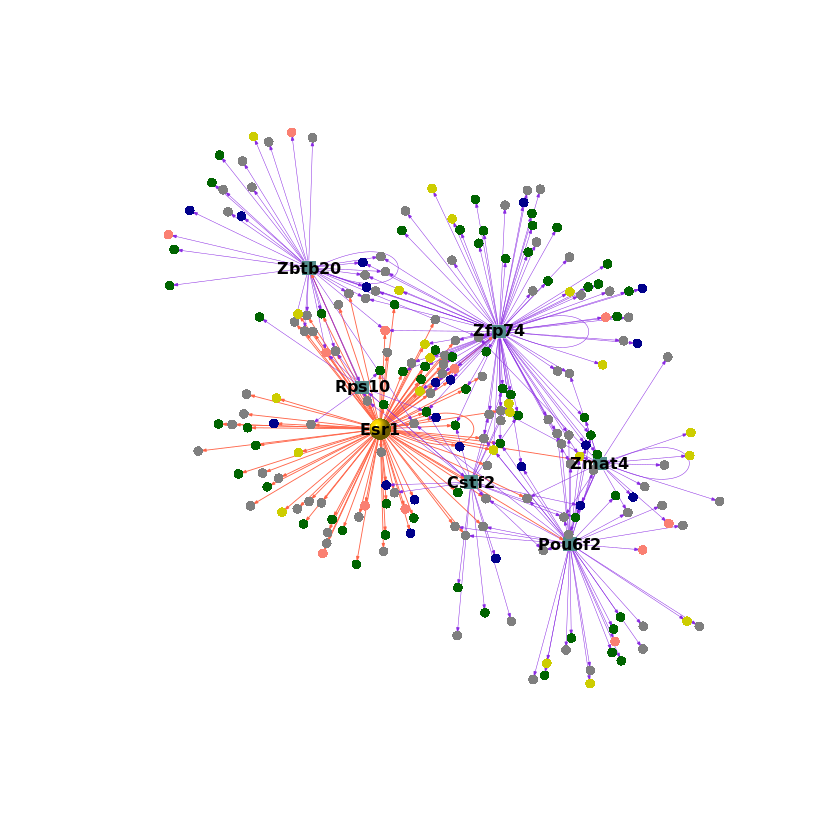

In [44]:
plot(network,vertex.frame.color=NA,vertex.label.color="black",vertex.label.font=2,vertex.label.family="Arial Black" ,vertex.label.cex=0.8,edge.arrow.size=edge.arrow.size,edge.color=edge.color,jitter = TRUE,vertex.col=color, layout=lay2)

# heatmap and dics plot

In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("xlsx")
#library(mgsa)
library(ggplot2)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}
temp<-c(Vgat2_barcode,Vgat4_barcode,Vgat16_barcode)
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AM" | stim=="P35M"| stim=="P23M"|stim=="Cast")))
MPOA.integrated<-subset(MPOA.integrated,cells=celltype)
Esr1KOM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/Esr1KOM.rds")
new.ident <- c("eMix1","eVgat1","eVglu1","eVgat2","eVgat3","eVgat4","eVglu2","eVglu3","eVgat5","eVgat6","eVgat7","eVgat8","eVgat9","eMix2","eVgat10","eVglu4","eVgat11","eVglu5","eVgat12","eVglu6","eAmbiguous")
names(x = new.ident) <- levels(x =Esr1KOM)
Esr1KOM<- RenameIdents(object =Esr1KOM, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Esr1KOM@assays$RNA@data[,which(Idents(object=Esr1KOM) %in% new.ident[i])]))}
celltype<-c(eVgat3_barcode,eVgat4_barcode) #201110 remove 7
KO<-subset(Esr1KOM,cells=celltype)
MPOA.integrated<-merge(x=MPOA.integrated,y=KO)

In [3]:
Cell_type<-c("Esr1KOM","P23M","Cast","P35M","AM")
Cell_type<-factor(Cell_type,levels=Cell_type)

In [5]:
gene_list<-c("Pou6f2","Zfp74","Cstf2","Esr1","Zbtb20","Rps10","Zmat4","Creb3l1","Tcf4","Bcl11a","Sox5","Lrrfip1","Zfp280d")

In [6]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
#Cell_number_t$pct[p]<-100*sum(MPOA.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$zscore[p]<-(mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])-mean(MPOA.integrated@assays$RNA@data[gene_list[i],]))/sd(MPOA.integrated@assays$RNA@data[gene_list[i],])
Cell_number_t$FC[p]<-mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])-mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim!=Cell_type[p]))])
Cell_number_t$percent[p]<- 100*sum(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))]>0)/length(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])
}
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] Esr1KOM P23M    Cast    P35M    AM      Esr1KOM P23M    Cast    P35M   
[10] AM      Esr1KOM P23M    Cast    P35M    AM      Esr1KOM P23M    Cast   
[19] P35M    AM      Esr1KOM P23M    Cast    P35M    AM      Esr1KOM P23M   
[28] Cast    P35M    AM      Esr1KOM P23M    Cast    P35M    AM      Esr1KOM
[37] P23M    Cast    P35M    AM      Esr1KOM P23M    Cast    P35M    AM     
[46] Esr1KOM P23M    Cast    P35M    AM      Esr1KOM P23M    Cast    P35M   
[55] AM      Esr1KOM P23M    Cast    P35M    AM      Esr1KOM P23M    Cast   
[64] P35M    AM     
Levels: Esr1KOM P23M Cast P35M AM

<ggproto object: Class ScaleDiscretePosition, ScaleDiscrete, Scale, gg>
    aesthetics: x xmin xmax xend
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: waiver
    is_discrete: function
    is_empty: function
    labels: KOM P23M Cast P35M AM
    limits: Esr1KOM P23M Cast P35M AM
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: waiver
    palette: function
    palette.cache: NULL
    position: top
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    range_c: <ggproto obje

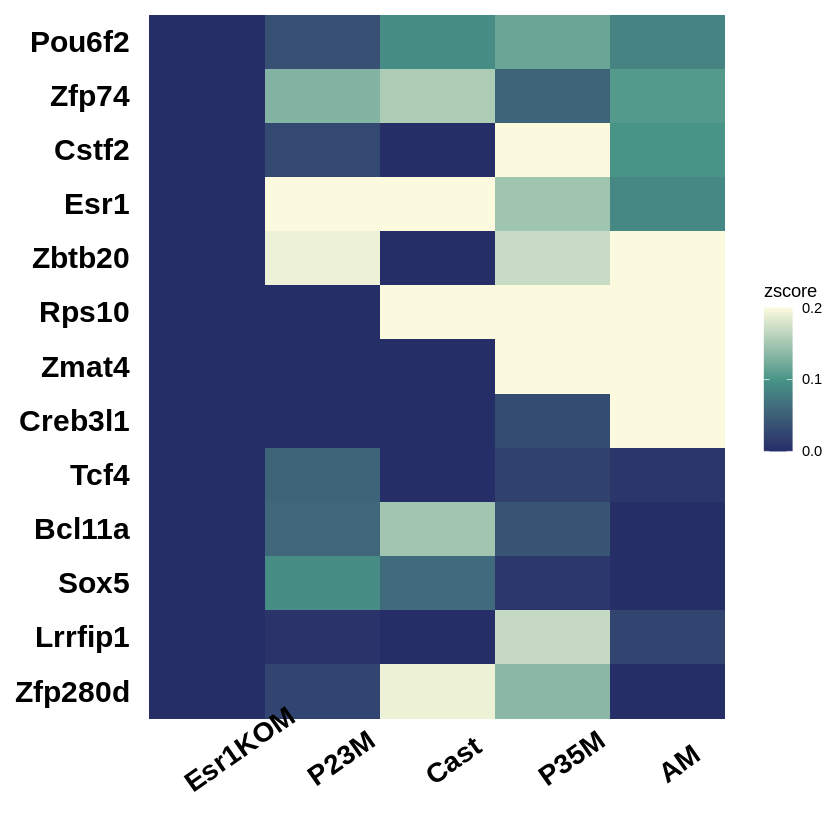

In [7]:
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- -0.0
high<-0.2
p<-ggplot(Cell_number, aes(cluster, gene))+ 
  geom_tile(aes(fill =zscore))+ scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = (low+high)/2,oob=squish)  #scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.1),low = "black",high = "yellow", oob=squish)+
scale_x_discrete(limits = (levels(Cell_number$cluster)),position = "top",labels=c("Esr1KOM" = "KOM","P23M" = "P23M", "Cast" = "Cast","P35M" = "P35M","AM" = "AM"))
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("group")+xlab("genes")+theme(axis.text.x=element_text(size=17,angle = 35, hjust = 0.2,vjust=0.6,color="black",face="bold"),axis.text.y=element_text(size=18,colour = "black",face="bold"),axis.title=element_text(size=0,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line =  element_blank(),axis.ticks.y = element_blank(),axis.ticks.x = element_blank())
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/TF_heatmap_male_age_hormonegene_agegene_zscore_",low,"_",high,"_mini_color_adjusted.pdf",sep=""),width=3.5,height=4)

In [303]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}
temp<-c(Vgat2_barcode,Vgat4_barcode,Vgat16_barcode)
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AM" | stim=="P35M"| stim=="P23M"|stim=="Cast")))
MPOA.integrated<-subset(MPOA.integrated,cells=celltype)

In [304]:
Cell_type<-c("P23M","Cast","P35M","AM")
Cell_type<-factor(Cell_type,levels=Cell_type)

In [305]:
gene_list<-c("Pou6f2","Cstf2","Zfp74","Esr1","Zbtb20","Rps10","Zmat4","Creb3l1","Tcf4","Bcl11a","Sox5","Lrrfip1","Zfp280d")

In [306]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
#Cell_number_t$pct[p]<-100*sum(MPOA.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$zscore[p]<-(mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])-mean(MPOA.integrated@assays$RNA@data[gene_list[i],]))/sd(MPOA.integrated@assays$RNA@data[gene_list[i],])
Cell_number_t$FC[p]<-mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])-mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim!=Cell_type[p]))])
Cell_number_t$percent[p]<- 100*sum(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))]>0)/length(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])
}
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] P23M Cast P35M AM   P23M Cast P35M AM   P23M Cast P35M AM   P23M Cast P35M
[16] AM   P23M Cast P35M AM   P23M Cast P35M AM   P23M Cast P35M AM   P23M Cast
[31] P35M AM   P23M Cast P35M AM   P23M Cast P35M AM   P23M Cast P35M AM   P23M
[46] Cast P35M AM   P23M Cast P35M AM  
Levels: P23M Cast P35M AM

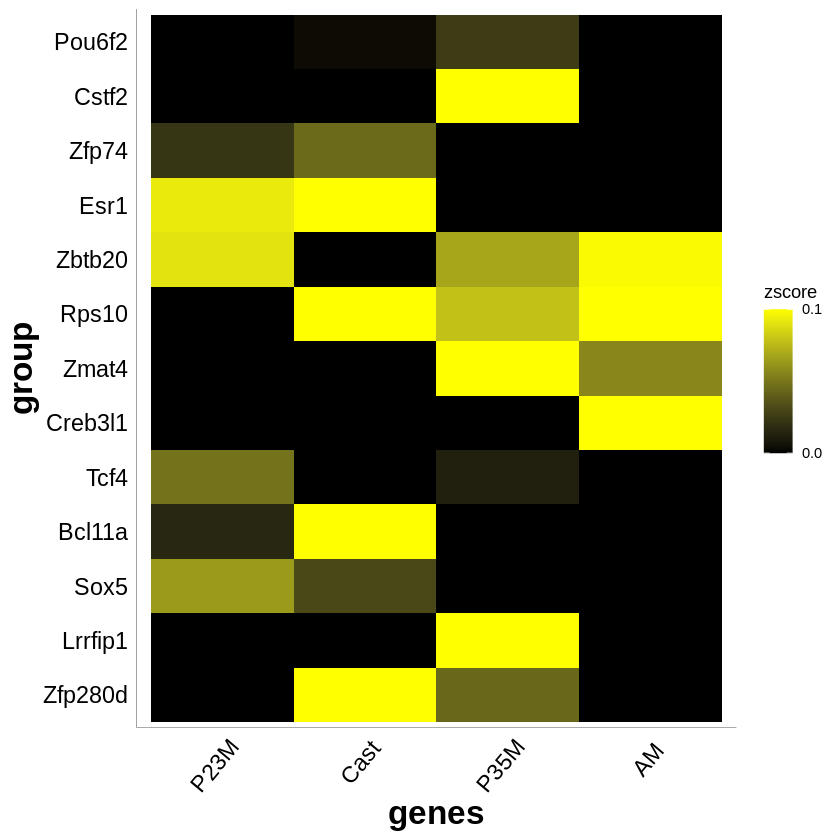

In [317]:
low<- -0.0
high<-0.1
p<-ggplot(Cell_number, aes(cluster, gene))+ 
  geom_tile(aes(fill =zscore))+ scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.1),low = "black",high = "yellow", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("group")+xlab("genes")+theme(axis.text.x=element_text(size=14,colour = "black",angle = 50, vjust =0.8,hjust=0.8),axis.text.y=element_text(size=14,colour = "black"),axis.title=element_text(size=20,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black", size = 0.1),axis.ticks.y = element_blank(),axis.ticks.x = element_blank())
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/TF_heatmap_male_age_hormonegene_agegene_zscore_withoutKO",low,"_",high,"_mini.pdf",sep=""),width=3.5,height=6)

# disc plots for additional info for male or common TFs

In [5]:
gene_list<-c("Cstf2","Pou6f2","Zfp74","Esr1","Zbtb20","Rps10","Zmat4")

In [6]:
type<-c("gene_expression","morphology","synapse","energy")
type<-factor(type,levels=type)

In [7]:
regulons<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/regulons_indirect.rds")

In [45]:
regulons

$Esr1
 [1] "Npm1"          "Pdzrn4"        "Esr1"          "Nrip1"        
 [5] "Nos1"          "Vsnl1"         "Cntnap2"       "Unc5d"        
 [9] "Chl1"          "Phyhipl"       "Gda"           "Prlr"         
[13] "Meg3"          "Zbtb20"        "Gad2"          "Ankrd46"      
[17] "Cox5a"         "Prkacb"        "Zmat4"         "Fgfr1"        
[21] "Snn"           "Rps10"         "Fut8"          "Hpcal1"       
[25] "Maged1"        "Actg1"         "Phactr1"       "Abat"         
[29] "Prkcb"         "Tmem30a"       "Atp2b1"        "Ptprm"        
[33] "A830018L16Rik" "Rtn4"          "Cdh4"          "Mcts1"        
[37] "1500009L16Rik" "Gnai1"         "Nudt4"         "Nop56"        
[41] "Tmod2"         "Sacs"          "Lrrfip2"       "Pappa"        
[45] "Hcn1"          "Nrcam"         "Atxn2"         "Hspa8"        
[49] "Sec61g"        "Crk"           "Tnpo3"         "Hnrnpa3"      
[53] "Wnt4"          "Ywhab"         "Snx5"          "Hapln4"       
[57] "Cckar"         "Atxn7l1"       "Pcp4l1"        "Cox8a"        
[61] "Daam1"         "Ift81"         "Pclo"          "Shisa6"       
[65] "Rps6ka6"       "Dync1li1"      "Pfdn4"         "Rala"         
[69] "Plcb1"         "Specc1"        "Kcnb1"         "Tmem150c"     
[73] "Commd3"        "Pim3"          "Ralgps2"       "Lhfpl3"       
[77] "Ncam2"         "Stk39"         "Hars"          "Armcx4"       
[81] "Pcbd1"         "Elovl5"        "Wwp1"          "Pard3"        
[85] "Zc3h14"        "Zfp385b"       "Clstn2"        "Bnip3"        
[89] "Tmem167"       "Hspa9"         "Dock3"         "Cstf2"        
[93] "Mrps36"        "Lrrn3"         "Tax1bp1"       "Exoc4"        
[97] "Pou6f2"        "Zfp74"        

$Rps10
[1] "Snn"    "Pappa"  "Sec61g" "Rpl27a" "Armcx4" "Bnip3"  "Cstf2" 

$Zbtb20
 [1] "Pgr"     "Fstl5"   "Id4"     "Unc5d"   "Lrp1b"   "Phyhipl" "Meg3"   
 [8] "Zbtb20"  "Slitrk1" "Rpl21"   "Snn"     "Rps10"   "Hpcal1"  "Cops2"  
[15] "Adra2a"  "Unc80"   "Oxct1"   "Scml4"   "Cct4"    "Fgf12"   "Chst11" 
[22] "Gabra3"  "Nos1ap"  "Daam1"   "Enpp2"   "Pfdn4"   "Sec22a"  "Dnajc15"
[29] "Manea"   "Tmeff1"  "Cntnap4" "Bnip3"   "Mast4"   "Tax1bp1" "Exoc4"  

$Pou6f2
 [1] "Pdzrn4"   "Vsnl1"    "Ap1s2"    "Irs4"     "Prlr"     "Psd3"    
 [7] "Prkacb"   "Slitrk5"  "Eef1a1"   "Gfra1"    "Hpcal1"   "Hs3st5"  
[13] "Dynlt3"   "Rtn4"     "Arhgap36" "Syt6"     "Ntng1"    "Irs2"    
[19] "Vdac2"    "Slitrk6"  "Rbfox3"   "Plcxd3"   "Adarb2"   "Gria3"   
[25] "Plxnc1"   "Pcp4l1"   "Park2"    "Snrpb2"   "Snx16"    "Specc1"  
[31] "Ralgps2"  "Pwwp2a"   "Ncor1"    "Bbip1"    "Mrpl33"   "Uba3"    
[37] "Mal2"     "Robo2"    "Zfyve9"   "Zadh2"    "Cbx4"     "Plekha7" 

$Zmat4
 [1] "Fstl5"   "Vsnl1"   "Slc32a1" "Zmat4"   "Gfra1"   "Gpbp1"   "Olfm3"  
 [8] "Eif4g3"  "Glra2"   "Rbms3"   "Ntng1"   "Kcnd2"   "Frmd4a"  "Lingo2" 
[15] "Vldlr"   "Acvr1c"  "Ndufs4"  "Zfp385b" "Galnt14" "Mal2"   

$Cstf2
 [1] "Npm1"    "Pdzrn4"  "Pcdh17"  "Rps10"   "Gfra1"   "Ogt"     "Eif4g3" 
 [8] "Stim2"   "Srsf3"   "Lrrfip2" "Pappa"   "Kcnd2"   "Cdh8"    "Ppia"   
[15] "H3f3a"   "Kcnb1"   "Ppid"    "Pitpnc1" "Nuak1"   "Tax1bp1" "Cbx4"   

$Zfp74
 [1] "Pgr"           "Npm1"          "Fstl5"         "Ptp4a1"       
 [5] "Nrip1"         "Cntnap2"       "Pak3"          "Id4"          
 [9] "Chl1"          "Ctnna2"        "Rpl30"         "Gda"          
[13] "Irs4"          "Prlr"          "Cnbp"          "Psd3"         
[17] "Camk4"         "Tbca"          "Zbtb20"        "Nrp1"         
[21] "Fut9"          "Il1rap"        "Rplp1"         "Fgfr1"        
[25] "Cadm2"         "Eif3e"         "Hs3st5"        "Cops2"        
[29] "Nrsn1"         "Dlgap1"        "Adra2a"        "Tmem30a"      
[33] "Atp2b1"        "Rtn4"          "Shisa2"        "Itfg1"        
[37] "Syt6"          "Tmem215"       "Stim2"         "Sytl4"        
[41] "Pdia3"         "Ntng1"         "Sacs"          "Rpl7a"        
[45] "Pappa"         "Nrcam"         "Cdh8"          "Gria3"        
[49] "Mettl9"        "Ppia"          "Tnpo3"

In [8]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(type)

Cell_number_t<- data.frame("cluster" =type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(type)){
Cell_number_t$number[p]<-sum(regulons[[gene_list[i]]] %in% eval(parse(text=as.character(type[p])))) 
}
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

ERROR: Error in eval(parse(text = as.character(type[p]))): object 'gene_expression' not found


In [68]:
max(Cell_number$number)

[1] 28

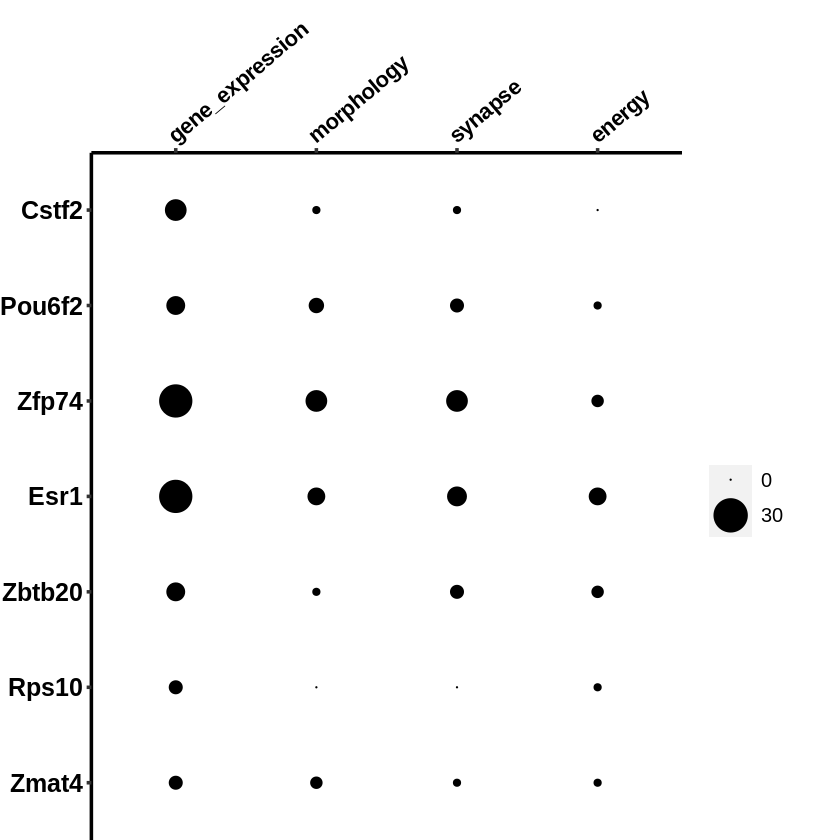

In [75]:
#disc
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = number), colour="black") + 
scale_x_discrete(limits = (levels(Cell_number$cluster)),position = "top")+scale_y_discrete(limits =(levels(Cell_number$gene)))+
 scale_size_continuous(range = c(0,9),limits=c(0,30),breaks=seq(0,30,30))+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=13,angle = 40, hjust = 0,vjust=-3,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.text=element_text(size=12),legend.title=element_blank(),legend.position ="right",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 28, 0, 0))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/discplot_maleTF_what gnee.pdf",height=3.7, width=3 , paper = "letter")

In [ ]:
# disc plots for additional info for male dimorphic

In [10]:
#edit210305
test<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/regulons_indirect.rds")
sum<-c(test$Esr1,test$Zbtb20,test$Pou6f2,test$Rps10,test$Zmat4,test$Cstf2,test$Zfp74)
sum<-unique(sum)
TF<-names(test)
#male_sum<-unique(c(sum,TF))
male_sum<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_0.1_246vs34.xlsx",sheetIndex=1)[,1]
test<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/regulons_indirect.rds")
sum<-c(test$Esr1,test$Zbtb20,test$Crev3l1,test$Tcf4,test$Rps10,test$Bcl11a,test$Sox5,test$Zmat4,test$Lrrfip1,test$Zfp280d)
sum<-unique(sum)
TF<-names(test)
#female_sum<-unique(c(sum,TF))
female_sum<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx",sheetIndex=1)[,1]
common_gene<-intersect(male_sum,female_sum)
#regulated_common_gene<-intersect(common_gene,sum)
dimorphic_gene<-as.character(male_sum[!(male_sum %in% common_gene)])


In [11]:
gene_list<-c("Cstf2","Pou6f2","Zfp74","Esr1","Zbtb20","Rps10","Zmat4")
type<-c("common_gene","dimorphic_gene")
type<-factor(type,levels=type)

In [12]:
regulons<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/regulons_indirect.rds")

In [13]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
regulated_dimorphic_gene<-numeric()
regulated_common_gene<-numeric()

for (i in 1:length(gene_list)){
L<-length(type)

Cell_number_t<- data.frame("cluster" =type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(type)){
Cell_number_t$number[p]<-sum(regulons[[gene_list[i]]] %in% eval(parse(text=as.character(type[p])))) 
if(type[p]=="common_gene"){regulated_common_gene<-c(regulated_common_gene,regulons[[gene_list[i]]][regulons[[gene_list[i]]] %in% eval(parse(text=as.character(type[p])))])}
else if(type[p]=="dimorphic_gene"){regulated_dimorphic_gene<-c(regulated_dimorphic_gene,regulons[[gene_list[i]]][regulons[[gene_list[i]]] %in% eval(parse(text=as.character(type[p])))])}
}
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] common_gene    dimorphic_gene common_gene    dimorphic_gene common_gene   
 [6] dimorphic_gene common_gene    dimorphic_gene common_gene    dimorphic_gene
[11] common_gene    dimorphic_gene common_gene    dimorphic_gene
Levels: common_gene dimorphic_gene

In [14]:
regulated_dimorphic_gene

[1] "Pcdh17"        "Eif4g3"        "Stim2"         "Lrrfip2"      
  [5] "Ppia"          "Kcnb1"         "Ppid"          "Pitpnc1"      
  [9] "Nuak1"         "Cbx4"          "Vsnl1"         "Arhgap36"     
 [13] "Rbfox3"        "Gria3"         "Pcp4l1"        "Pwwp2a"       
 [17] "Ncor1"         "Bbip1"         "Mrpl33"        "Robo2"        
 [21] "Zfyve9"        "Zadh2"         "Cbx4"          "Plekha7"      
 [25] "Tbca"          "Adra2a"        "Atp2b1"        "Tmem215"      
 [29] "Stim2"         "Sytl4"         "Sacs"          "Gria3"        
 [33] "Ppia"          "Hnrnpa3"       "Ankrd13c"      "Ggps1"        
 [37] "Ephb1"         "Rtn3"          "Ift81"         "Chst2"        
 [41] "Pfdn4"         "Sacm1l"        "Ezr"           "Tmem150c"     
 [45] "Ppid"          "Ncor1"         "Kif2a"         "Psmc6"        
 [49] "Wwp1"          "Tnr"           "Zfp385b"       "Stt3b"        
 [53] "Scd1"          "Robo2"         "Zfyve9"        "Mrps36"       
 [57] "Fam69a"        "Zfp74"         "Vsnl1"         "Gad2"         
 [61] "Cox5a"         "Actg1"         "Abat"          "Prkcb"        
 [65] "Atp2b1"        "A830018L16Rik" "Cdh4"          "Gnai1"        
 [69] "Nudt4"         "Sacs"          "Lrrfip2"       "Hcn1"         
 [73] "Atxn2"         "Hspa8"         "Sec61g"        "Hnrnpa3"      
 [77] "Ywhab"         "Cckar"         "Pcp4l1"        "Cox8a"        
 [81] "Ift81"         "Shisa6"        "Dync1li1"      "Pfdn4"        
 [85] "Rala"          "Plcb1"         "Kcnb1"         "Tmem150c"     
 [89] "Commd3"        "Pim3"          "Ncam2"         "Stk39"        
 [93] "Hars"          "Armcx4"        "Pcbd1"         "Elovl5"       
 [97] "Wwp1"          "Zc3h14"        "Zfp385b"       "Clstn2"       
[101] "Bnip3"         "Tmem167"       "Hspa9"         "Cstf2"        
[105] "Mrps36"        "Lrrn3"         "Exoc4"         "Pou6f2"       
[109] "Zfp74"         "Adra2a"        "Enpp2"         "Pfdn4"        
[113] "Dnajc15"       "Tmeff1"        "Bnip3"         "Exoc4"        
[117] "Sec61g"        "Armcx4"        "Bnip3"         "Cstf2"        
[121] "Vsnl1"         "Eif4g3"        "Glra2"         "Vldlr"        
[125] "Acvr1c"        "Ndufs4"        "Zfp385b"

In [15]:
regulated_common_gene

[1] "Npm1"          "Pdzrn4"        "Rps10"         "Gfra1"        
  [5] "Ogt"           "Srsf3"         "Pappa"         "Kcnd2"        
  [9] "Cdh8"          "H3f3a"         "Tax1bp1"       "Pdzrn4"       
 [13] "Ap1s2"         "Irs4"          "Prlr"          "Psd3"         
 [17] "Prkacb"        "Slitrk5"       "Eef1a1"        "Gfra1"        
 [21] "Hpcal1"        "Hs3st5"        "Dynlt3"        "Rtn4"         
 [25] "Syt6"          "Ntng1"         "Irs2"          "Vdac2"        
 [29] "Slitrk6"       "Plcxd3"        "Adarb2"        "Plxnc1"       
 [33] "Park2"         "Snrpb2"        "Snx16"         "Specc1"       
 [37] "Ralgps2"       "Uba3"          "Mal2"          "Pgr"          
 [41] "Npm1"          "Fstl5"         "Ptp4a1"        "Nrip1"        
 [45] "Cntnap2"       "Pak3"          "Id4"           "Chl1"         
 [49] "Ctnna2"        "Rpl30"         "Gda"           "Irs4"         
 [53] "Prlr"          "Cnbp"          "Psd3"          "Camk4"        
 [57] "Zbtb20"        "Nrp1"          "Fut9"          "Il1rap"       
 [61] "Rplp1"         "Fgfr1"         "Cadm2"         "Eif3e"        
 [65] "Hs3st5"        "Cops2"         "Nrsn1"         "Dlgap1"       
 [69] "Tmem30a"       "Rtn4"          "Shisa2"        "Itfg1"        
 [73] "Syt6"          "Pdia3"         "Ntng1"         "Rpl7a"        
 [77] "Pappa"         "Nrcam"         "Cdh8"          "Mettl9"       
 [81] "Tnpo3"         "Frmd4a"        "Snrpd1"        "Nos1ap"       
 [85] "Dmtf1"         "St8sia3"       "Ikzf2"         "Nemf"         
 [89] "H3f3a"         "Mfn2"          "Ralgps2"       "Cntnap4"      
 [93] "Galnt14"       "4833439L19Rik" "Mast4"         "Npm1"         
 [97] "Pdzrn4"        "Esr1"          "Nrip1"         "Nos1"         
[101] "Cntnap2"       "Unc5d"         "Chl1"          "Phyhipl"      
[105] "Gda"           "Prlr"          "Meg3"          "Zbtb20"       
[109] "Ankrd46"       "Prkacb"        "Zmat4"         "Fgfr1"        
[113] "Snn"           "Rps10"         "Fut8"          "Hpcal1"       
[117] "Maged1"        "Phactr1"       "Tmem30a"       "Ptprm"        
[121] "Rtn4"          "Mcts1"         "1500009L16Rik" "Nop56"        
[125] "Tmod2"         "Pappa"         "Nrcam"         "Crk"          
[129] "Tnpo3"         "Wnt4"          "Snx5"          "Hapln4"       
[133] "Atxn7l1"       "Daam1"         "Pclo"          "Rps6ka6"      
[137] "Specc1"        "Ralgps2"       "Lhfpl3"        "Pard3"        
[141] "Dock3"         "Tax1bp1"       "Pgr"           "Fstl5"        
[145] "Id4"           "Unc5d"         "Lrp1b"         "Phyhipl"      
[149] "Meg3"          "Zbtb20"        "Slitrk1"       "Rpl21"        
[153] "Snn"           "Rps10"         "Hpcal1"        "Cops2"        
[157] "Unc80"         "Oxct1"         "Scml4"         "Cct4"         
[161] "Fgf12"         "Chst11"        "Gabra3"        "Nos1ap"       
[165] "Daam1"         "Sec22a"        "Manea"         "Cntnap4"      
[169] "Mast4"         "Tax1bp1"       "Snn"           "Pappa"        
[173] "Rpl27a"        "Fstl5"         "Slc32a1"       "Zmat4"        
[177] "Gfra1"         "Gpbp1"         "Olfm3"         "Rbms3"        
[181] "Ntng1"         "Kcnd2"         "Frmd4a"        "Lingo2"       
[185] "Galnt14"       "Mal2"

In [16]:
percentage<-numeric()
for(i in 1:dim(Cell_number)[1]){
    if(Cell_number$cluster[i]=="common_gene"){
        percentage[i]<-100*Cell_number$number[i]/length(regulated_common_gene)
    }else if(Cell_number$cluster[i]=="dimorphic_gene"){
        percentage[i]<-100*Cell_number$number[i]/length(regulated_dimorphic_gene)
    }
}
Cell_number$percentage_of_genes<-percentage

In [17]:
saveRDS(regulated_dimorphic_gene,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/Esr1_regulated_male_dimorphic_gene.rds")

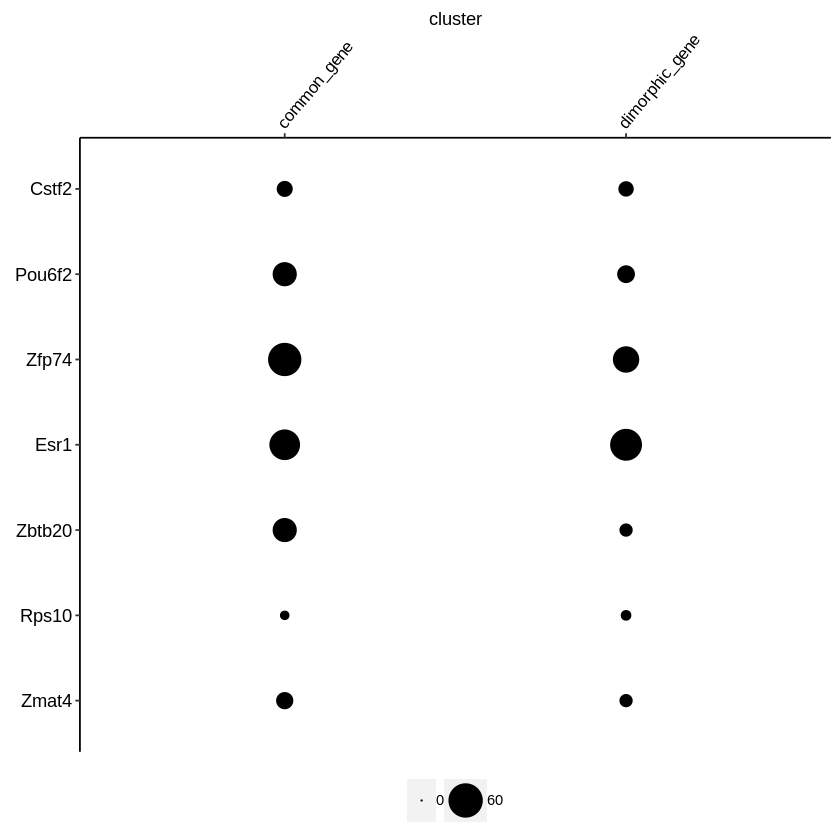

In [18]:
#disc
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = number), colour="black") + 
scale_x_discrete(limits = (levels(Cell_number$cluster)),position = "top")+scale_y_discrete(limits =(levels(Cell_number$gene)))+
 scale_size_continuous(range = c(0,9),limits=c(0,60),breaks=seq(0,60,60))+
theme(axis.title.y=element_text(size=0),axis.text.y=element_text(size=11,color="black"),axis.text.x=element_text(size=10,angle = 50, hjust = -0,vjust=3,color="black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position ="bottom",legend.title = element_text(color = "blue", size = 0),)

ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/discplot_maleTF_commondimorphic.pdf",height=4.2, width=1.6 , paper = "letter")

In [56]:
library(ggplot2)

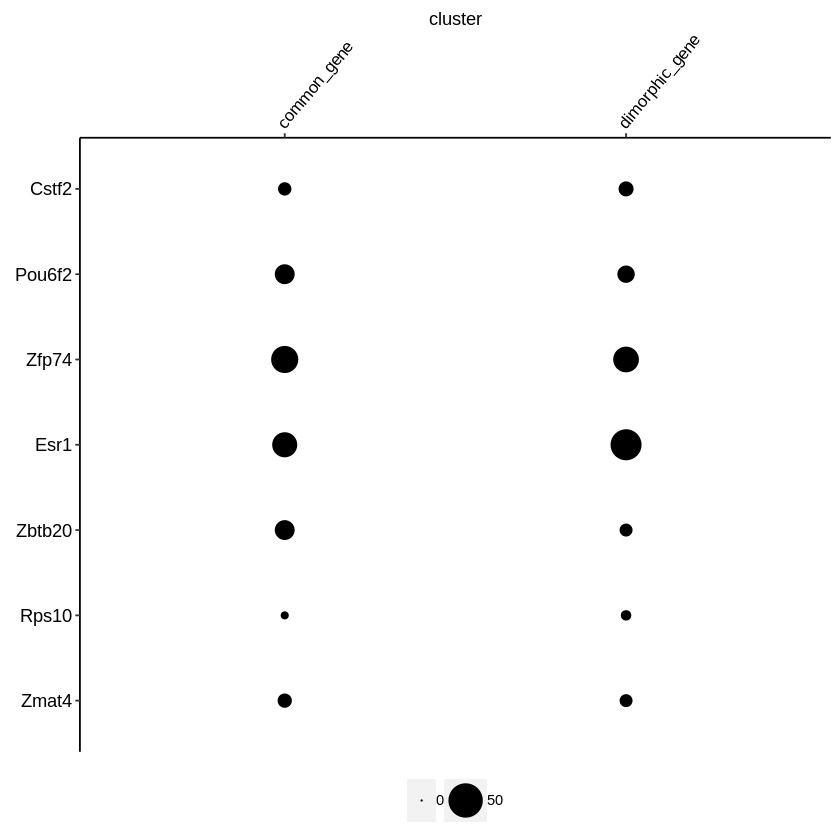

In [19]:
#perentage
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = percentage_of_genes), colour="black") + 
scale_x_discrete(limits = (levels(Cell_number$cluster)),position = "top")+scale_y_discrete(limits =(levels(Cell_number$gene)))+
 scale_size_continuous(range = c(0,9),limits=c(0,50),breaks=seq(0,50,50))+
theme(axis.title.y=element_text(size=0),axis.text.y=element_text(size=11,color="black"),axis.text.x=element_text(size=10,angle = 50, hjust = -0,vjust=3,color="black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position ="bottom",legend.title = element_text(color = "blue", size = 0),)

ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/discplot_maleTF_commondimorphic_percentage.pdf",height=4.2, width=1.6 , paper = "letter")